In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ruta_fichero_vuelos = "/content/drive/MyDrive/Colab Notebooks/flights.csv"
dataset_vuelos = open(ruta_fichero_vuelos, "r")

In [ ]:
import pandas as pd
dataset_vuelos=pd.read_csv(ruta_fichero_vuelos)
#Los tres primero pasos nos han servido para leer el dataset.

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


<AxesSubplot:>

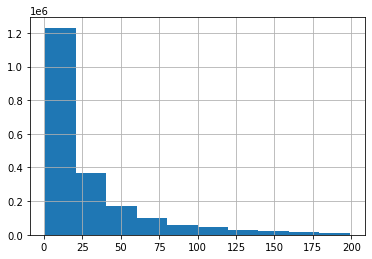

In [ ]:
dataset_vuelos[(dataset_vuelos["ARRIVAL_DELAY"] > 0) & (dataset_vuelos["ARRIVAL_DELAY"] < 200)] ["ARRIVAL_DELAY"].hist()

In [ ]:
dataset_vuelos["RETRASO"] = dataset_vuelos.ARRIVAL_DELAY > 15
dataset_vuelos.RETRASO

0          False
1          False
2          False
3          False
4          False
           ...  
5819074    False
5819075    False
5819076    False
5819077    False
5819078    False
Name: RETRASO, Length: 5819079, dtype: bool

In [ ]:
dataset_vuelos.RETRASO = (dataset_vuelos.ARRIVAL_DELAY > 15).astype('category').cat.codes
vuelos_no_cancelados = dataset_vuelos[(dataset_vuelos.CANCELLED == 0) & (dataset_vuelos.DIVERTED == 0)].sample(frac=0.02).copy()
vuelos_no_cancelados["SCHEDULED_DEPARTURE"] = vuelos_no_cancelados["SCHEDULED_DEPARTURE"].apply(lambda x: int('{0:0>4}'.format(x)[0:2]))
vuelos_no_cancelados["SCHEDULED_ARRIVAL"] = vuelos_no_cancelados["SCHEDULED_ARRIVAL"].apply(lambda x: int('{0:0>4}'.format(x)[0:2]))
vuelos_no_cancelados["SCHEDULED_DEPARTURE"] = vuelos_no_cancelados["SCHEDULED_DEPARTURE"]/24
vuelos_no_cancelados["SCHEDULED_ARRIVAL"] = vuelos_no_cancelados["SCHEDULED_ARRIVAL"]/24
vuelos_no_cancelados["DAY"] = vuelos_no_cancelados["DAY"]/31
vuelos_no_cancelados["DAY_OF_WEEK"] = vuelos_no_cancelados["DAY_OF_WEEK"]/7
vuelos_no_cancelados["SCHEDULED_TIME"] = vuelos_no_cancelados["SCHEDULED_TIME"]/vuelos_no_cancelados["SCHEDULED_TIME"].max()
vuelos_no_cancelados["DISTANCE"] = vuelos_no_cancelados["DISTANCE"]/vuelos_no_cancelados["DISTANCE"].max()
vuelos_retraso_x = vuelos_no_cancelados[['MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'SCHEDULED_TIME', 'DISTANCE', 'SCHEDULED_ARRIVAL']]
retraso_x_dummies = pd.get_dummies(data= vuelos_retraso_x, columns = ['MONTH', 'DAY_OF_WEEK', 'AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT'])

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import tree
import matplotlib.pyplot as plt
train_x, test_x, train_y, test_y = train_test_split(retraso_x_dummies, vuelos_no_cancelados.RETRASO, test_size = 0.3, random_state = 123)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils import plot_model
from keras.utils.np_utils import to_categorical

In [ ]:
train_x

,DAY,SCHEDULED_DEPARTURE,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,MONTH_1,MONTH_2,MONTH_3,MONTH_4,MONTH_5,...,DESTINATION_AIRPORT_TYS,DESTINATION_AIRPORT_UST,DESTINATION_AIRPORT_VEL,DESTINATION_AIRPORT_VLD,DESTINATION_AIRPORT_VPS,DESTINATION_AIRPORT_WRG,DESTINATION_AIRPORT_WYS,DESTINATION_AIRPORT_XNA,DESTINATION_AIRPORT_YAK,DESTINATION_AIRPORT_YUM
5408622,0.161290,0.416667,0.118519,0.078467,0.500000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39998,0.096774,0.625000,0.262222,0.222155,0.708333,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3375514,0.967742,0.208333,0.143704,0.083484,0.250000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4687954,0.645161,0.291667,0.210370,0.169376,0.416667,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3120469,0.451613,0.875000,0.080000,0.026891,0.875000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3158577,0.548387,0.291667,0.380741,0.335139,0.375000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1232468,0.677419,0.541667,0.219259,0.152519,0.583333,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5216920,0.709677,0.791667,0.253333,0.175396,0.875000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3330193,0.870968,0.458333,0.140741,0.101746,0.500000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
model = Sequential ()
model.add(Dense(150, input_dim = 1432, activation="tanh"))
model.add(Dense(150, activation="tanh"))
model.add(Dense(150, activation="tanh"))
model.add(Dense(2, activation="softmax"))

In [ ]:
model.compile(loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
resultado = model.fit(train_x, train_y, validation_data = (test_x, test_y), epochs=20)

Epoch 1/20
2500/2500 [==============================] - 18s 7ms/step - loss: 0.4621 - accuracy: 0.8195 - val_loss: 0.4541 - val_accuracy: 0.8221
Epoch 2/20
2500/2500 [==============================] - 16s 6ms/step - loss: 0.4553 - accuracy: 0.8196 - val_loss: 0.4488 - val_accuracy: 0.8228
Epoch 3/20
2500/2500 [==============================] - 16s 6ms/step - loss: 0.4520 - accuracy: 0.8192 - val_loss: 0.4512 - val_accuracy: 0.8229
Epoch 4/20
2500/2500 [==============================] - 16s 6ms/step - loss: 0.4498 - accuracy: 0.8199 - val_loss: 0.4476 - val_accuracy: 0.8227
Epoch 5/20
2500/2500 [==============================] - 16s 6ms/step - loss: 0.4479 - accuracy: 0.8207 - val_loss: 0.4531 - val_accuracy: 0.8225
Epoch 6/20
2500/2500 [==============================] - 16s 6ms/step - loss: 0.4461 - accuracy: 0.8208 - val_loss: 0.4451 - val_accuracy: 0.8229
Epoch 7/20
2500/2500 [==============================] - 18s 7ms/step - loss: 0.4451 - accuracy: 0.8211 - val_loss: 0.4472 - val_ac

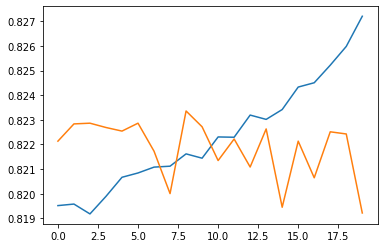

In [ ]:
import matplotlib.pyplot as plt
plt.plot(resultado.history['accuracy'])
plt.plot(resultado.history['val_accuracy'])

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
predicciones = model.predict(test_x)
predicciones = np.argmax(predicciones, axis=1)
matriz_confusion = confusion_matrix(test_y, predicciones)
matriz_confusion = pd.DataFrame(matriz_confusion, index=['No retraso', 'Retraso'], columns=['No retraso (predicción)', 'Retraso (predicción)'])

1072/1072 [==============================] - 3s 2ms/step


In [ ]:
print(matriz_confusion)

            No retraso (predicción)  Retraso (predicción)
No retraso                    27780                   430
Retraso                        5768                   306


In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from keras.wrappers.scikit_learn import KerasClassifier

In [ ]:
estimator = KerasClassifier(build_fn=model, epochs=20, batch_size=64, verbose=0)
kfold = KFold(n_splits=5, shuffle=True, random_state=123)

<ipython-input-19-a1815507538d>:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  estimator = KerasClassifier(build_fn=model, epochs=20, batch_size=64, verbose=0)


In [ ]:
results = cross_val_score(estimator, retraso_x_dummies, vuelos_no_cancelados.RETRASO, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
......dense_2
.........vars
............0
............1
......dense_3
.........vars
............0
............1
...metrics
......mean
.........vars
............0
............1
......mean_metric_wrapper
.........vars
............0
............1
...optimizer
......vars
.........0
.........1
.........2
.........3
.........4
.........5
.........6
.........7
.........8
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                                    2023-03-08 15:07:05         2272
metadata.json                                  2023-03-08 15:07:05           64
variables.h5                                   2023-03-08 15:07:05      2109648
Keras model archive loading:
File Name                                             Modified

ValueError: ignored